In [2]:
rdd = sc.textFile("CS Satisfaction Report.tsv")
print "Here are the data columns:\n"
for col in rdd.first().split("\t"):
    print col

Here are the data columns:

Timestamp
Standing
Do you feel like you are getting a satisfactory undergraduate CS education at ŞEHİR?
Would you recommend ŞEHİR CS to your friends?
What are the strengths of ŞEHİR CS?
What are the weaknesses of ŞEHİR CS?
If you were given the opportunity, what would you change regarding undergraduate CS education at ŞEHİR?


In [3]:
rdd.take(5)

[u'Timestamp\tStanding\tDo you feel like you are getting a satisfactory undergraduate CS education at \u015eEH\u0130R?\tWould you recommend \u015eEH\u0130R CS to your friends?\tWhat are the strengths of \u015eEH\u0130R CS?\tWhat are the weaknesses of \u015eEH\u0130R CS?\tIf you were given the opportunity, what would you change regarding undergraduate CS education at \u015eEH\u0130R?',
 u'12/12/2016 11:07:03\tJunior (Year 3)\tMaybe\tMaybe\tStrength education, homeworks, assignments. They force to study very well\tTeaching assistants not very effective extends some of these. \tI dont think about that.',
 u'12/12/2016 11:07:35\tJunior (Year 3)\tYes\tYes\tRules \tRules of the department\tCurriculum , and some courses  ',
 u'12/12/2016 11:10:29\tJunior (Year 3)\tYes\tYes\tExperienced lecturers, courses offered give the opportunity of becoming a versatile engineer after graduation, \tLow number of lecturers, combination of some CS courses with EE courses, \tI would make it more CS based rath

<h1>Indexing</h1>

<h2><i>zipWithIndex</i> zips this RDD with its element indices.

<p>
The ordering is first based on the partition index and then 
the ordering of items within each partition. 
<p>
So the first item in the first partition gets index 0, and 
the last item in the last partition receives the largest index.
</h2>

In [4]:
rdd2 = rdd.zipWithIndex()\
            .filter(lambda x: x[1] > 0)\
            .map(lambda x: x[0])\
            .map(lambda t: (t.split("\t")[1].lower().strip(),t))

In [5]:
rdd2.take(2)

[(u'junior (year 3)',
  u'12/12/2016 11:07:03\tJunior (Year 3)\tMaybe\tMaybe\tStrength education, homeworks, assignments. They force to study very well\tTeaching assistants not very effective extends some of these. \tI dont think about that.'),
 (u'junior (year 3)',
  u'12/12/2016 11:07:35\tJunior (Year 3)\tYes\tYes\tRules \tRules of the department\tCurriculum , and some courses  ')]

In [6]:
prdd = rdd2.partitionBy(5)

In [7]:
prdd.getNumPartitions()

5

In [8]:
prdd.mapPartitions(lambda items: [len(list(items))])\
    .collect()

[2, 11, 20, 0, 25]

In [17]:
prdd.mapValues(lambda t: (t.split("\t")[2],t.split("\t")[3]))\
    .collect()

[(u'freshmen (year 1)', (u'Yes', u'Yes')),
 (u'', (u'No', u'No')),
 (u'sophomore (year 2)', (u'No', u'No')),
 (u'sophomore (year 2)', (u'No', u'No')),
 (u'sophomore (year 2)', (u'Maybe', u'Maybe')),
 (u'sophomore (year 2)', (u'No', u'Maybe')),
 (u'sophomore (year 2)', (u'No', u'No')),
 (u'sophomore (year 2)', (u'No', u'No')),
 (u'sophomore (year 2)', (u'Maybe', u'Maybe')),
 (u'sophomore (year 2)', (u'Maybe', u'Maybe')),
 (u'sophomore (year 2)', (u'Maybe', u'No')),
 (u'sophomore (year 2)', (u'No', u'Maybe')),
 (u'sophomore (year 2)', (u'Maybe', u'Yes')),
 (u'senior (year 4)', (u'Maybe', u'Yes')),
 (u'senior (year 4)', (u'Maybe', u'No')),
 (u'senior (year 4)', (u'Maybe', u'Maybe')),
 (u'senior (year 4)', (u'Maybe', u'Maybe')),
 (u'senior (year 4)', (u'Yes', u'Yes')),
 (u'senior (year 4)', (u'No', u'Maybe')),
 (u'senior (year 4)', (u'Maybe', u'Maybe')),
 (u'senior (year 4)', (u'Maybe', u'No')),
 (u'senior (year 4)', (u'Maybe', u'Maybe')),
 (u'senior (year 4)', (u'Maybe', u'Yes')),
 (u'sen

In [10]:
cleaned = prdd.mapValues(lambda t: (t.split("\t")[2],t.split("\t")[3]))

In [11]:
def transformValues(t):
    l = []
    for val in t:
        tv = 0
        if val == "Yes":
            tv = 1
        elif val == "No":
            tv = -1
        l.append(tv)
    return tuple(l)

In [12]:
cleaned.mapValues(transformValues)\
        .take(2)

[(u'freshmen (year 1)', (1, 1)), (u'', (-1, -1))]

In [13]:
interim = cleaned.mapValues(transformValues)
interim.groupByKey().mapValues(list).collect()

[(u'', [(-1, -1)]),
 (u'freshmen (year 1)', [(1, 1)]),
 (u'sophomore (year 2)',
  [(-1, -1),
   (-1, -1),
   (0, 0),
   (-1, 0),
   (-1, -1),
   (-1, -1),
   (0, 0),
   (0, 0),
   (0, -1),
   (-1, 0),
   (0, 1)]),
 (u'senior (year 4)',
  [(0, 1),
   (0, -1),
   (0, 0),
   (0, 0),
   (1, 1),
   (-1, 0),
   (0, 0),
   (0, -1),
   (0, 0),
   (0, 1),
   (-1, -1),
   (0, 0),
   (0, 0),
   (0, 0),
   (1, -1),
   (1, 1),
   (-1, 1),
   (0, 0),
   (-1, 1),
   (-1, -1)]),
 (u'junior (year 3)',
  [(0, 0),
   (1, 1),
   (1, 1),
   (0, -1),
   (1, 1),
   (-1, 0),
   (0, -1),
   (0, 0),
   (0, 1),
   (-1, 1),
   (1, 1),
   (0, 1),
   (1, 1),
   (0, -1),
   (0, -1),
   (0, 0),
   (-1, -1),
   (0, -1),
   (-1, 1),
   (-1, 1),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0),
   (0, 0)])]

In [14]:
results = interim.reduceByKey(lambda x,y:(x[0]+y[0],x[1]+y[1]))\
                 .collect()
print results

[(u'', (-1, -1)), (u'freshmen (year 1)', (1, 1)), (u'sophomore (year 2)', (-6, -4)), (u'senior (year 4)', (-2, 1)), (u'junior (year 3)', (0, 4))]


In [15]:
results = filter(lambda x: x[0], results)
results = sorted(results, key = lambda x: x[0][-2:])

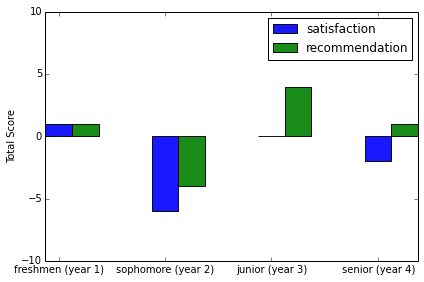

In [30]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 4
satisfaction = map(lambda x: x[1][0], results)
recommendation = map(lambda x: x[1][1], results)
xticks = map(lambda x: x[0], results)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.9
 
bars1 = plt.bar(index, satisfaction, bar_width,
                 alpha=opacity,
                 color='b',
                 label='satisfaction')
 
bars2 = plt.bar(index + bar_width, recommendation, bar_width,
                 alpha=opacity,
                 color='g',
                 label='recommendation')
 
plt.ylim([-10,10])
plt.ylabel('Total Score')
plt.xticks(index + bar_width / 2, xticks)
plt.legend()
 
plt.tight_layout()
plt.show()

<h1>Computation of ProductRanks</h1>

<h2>You are given a network of frequently co-purchased products.</h2>

<h2>Iterative Algorithm for computing product ranks:</h2>
<h3>
<p>
i. Initialise each product $p$’s rank to $1.0$.   
<p>
ii. On each iteration, have each product $p$ send a contribution 
of $contribution = \frac{p}{numOfNeighbours(p)}$ to its neighbours. 
<p>
iii. Set each product’s rank to $ 0.15 + 0.85 \times \sum contributions\_received $.
</h3>

In [26]:
network = [(1,[2,3,4,5,6]),(2,[1]),(3,[1]),(4,[1]),(5,[1,6,8]),
           (6,[1,5,7,10,14]),(7,[6,8]),(8,[5,7,9]),(9,[8,10]),
           (10,[6,9]),(11,[14]),(12,[14,15]),(13,[14]),
           (14,[6,11,12,13]),(15,[12])]

In [27]:
initialranks = []
for i in range(1,16):
    initialranks.append((i,1.0))
print initialranks

[(1, 1.0), (2, 1.0), (3, 1.0), (4, 1.0), (5, 1.0), (6, 1.0), (7, 1.0), (8, 1.0), (9, 1.0), (10, 1.0), (11, 1.0), (12, 1.0), (13, 1.0), (14, 1.0), (15, 1.0)]


In [28]:
links = sc.parallelize(network)
ranks = sc.parallelize(initialranks)
flattened_links = links.flatMapValues(lambda l: [(e, 1.0/len(l)) for e in l])

p_flattened_links = flattened_links.partitionBy(2).persist()

for i in range(20):
    ranks = p_flattened_links.join(ranks)\
    .map(lambda v: (v[1][0][0],v[1][0][1]*v[1][1]))\
    .reduceByKey(lambda x,y:x+y)\
    .mapValues(lambda v: v*0.85+0.15)
    
ranks = ranks.collect()
ranks.sort(key = lambda v: v[1], reverse = True)

In [17]:
for (p, rank) in ranks:
    print (p, rank)

(1, 2.1049836932457753)
(6, 1.9377628683793553)
(14, 1.8432928919203775)
(8, 1.1865791688644425)
(5, 1.1736178413373295)
(12, 1.0519462092628655)
(9, 0.8423012970898414)
(10, 0.8360108464294258)
(7, 0.8147899753247987)
(15, 0.5946235277491624)
(11, 0.5438040411795152)
(13, 0.5438040411795152)
(2, 0.5088278660125308)
(3, 0.5088278660125308)
(4, 0.5088278660125308)
